In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import os
from pathlib import Path
import numpy as np
import pandas as pd


%matplotlib inline

In [2]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vikthour","key":"854772165a20adf6b63b62f944d1936f"}'}

In [3]:
# Create a kaggle folder
! mkdir ~/.kaggle

In [4]:
# Copy the kaggle.json file into the /.kaggle folder
! cp kaggle.json ~/.kaggle/

In [5]:
# Permission for the json to be executed.

!chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d andrewmvd/leukemia-classification -p Dataset

 98% 849M/867M [00:07<00:00, 138MB/s]
100% 867M/867M [00:07<00:00, 120MB/s]


In [7]:
!unzip Dataset/leukemia-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_12_5_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_12_6_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_12_7_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_13_1_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_13_2_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_13_3_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_1_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_2_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_3_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_4_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_5_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_6_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/

In [8]:
#Select the directory
leukemia_train_dir = Path('/content/C-NMC_Leukemia/training_data')
leukemia_val_dir = Path('/content/C-NMC_Leukemia/validation_data')
leukemia_test_dir = Path('/content/C-NMC_Leukemia/testing_data')

#Create filepath using the directory
train_filepath = list(leukemia_train_dir.glob(r'**/*.bmp'))
val_filepath = list(leukemia_val_dir.glob(r'**/*.bmp'))
test_filepath = list(leukemia_test_dir.glob(r'**/*.bmp'))

#Select labels
train_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], train_filepath))
val_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], val_filepath))
test_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], test_filepath))

#Path and Label for the trainset
train_filepaths = pd.Series(train_filepath, name= 'File').astype(str)
train_labels = pd.Series(train_labels, name= 'Label')
train_df = pd.concat([train_filepaths, train_labels], axis= 1)

#Path and Label for valset
val_filepaths = pd.Series(val_filepath, name= 'File').astype(str)
val_labels = pd.Series(val_labels, name= 'Label')
val_df = pd.concat([val_filepaths, val_labels], axis=1)

#Path and Label for testset
test_filepaths = pd.Series(test_filepath, name= 'File').astype(str)
test_labels = pd.Series(val_labels, name= 'Label')
test_df = pd.concat([test_filepaths, test_labels], axis=1)



In [9]:
val_df.head()

,File,Label
0,/content/C-NMC_Leukemia/validation_data/C-NMC_...,C-NMC_test_prelim_phase_data
1,/content/C-NMC_Leukemia/validation_data/C-NMC_...,C-NMC_test_prelim_phase_data
2,/content/C-NMC_Leukemia/validation_data/C-NMC_...,C-NMC_test_prelim_phase_data
3,/content/C-NMC_Leukemia/validation_data/C-NMC_...,C-NMC_test_prelim_phase_data
4,/content/C-NMC_Leukemia/validation_data/C-NMC_...,C-NMC_test_prelim_phase_data


In [10]:
train_df.head(2)

,File,Label
0,/content/C-NMC_Leukemia/training_data/fold_0/h...,hem
1,/content/C-NMC_Leukemia/training_data/fold_0/h...,hem


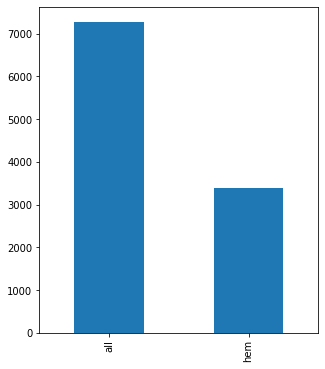

In [11]:
plt.figure(figsize = (5, 6))
train_df.Label.value_counts().plot(kind='bar')

Text(0.5, 0, '(450, 450, 3)')

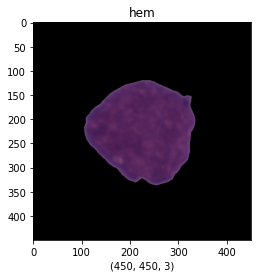

In [12]:
plt.figure(figsize=(4, 4))
x = plt.imread(train_df['File'][20])
plt.imshow(x)
plt.title(train_df.Label[20])
plt.xlabel(x.shape)

<Figure size 720x720 with 0 Axes>

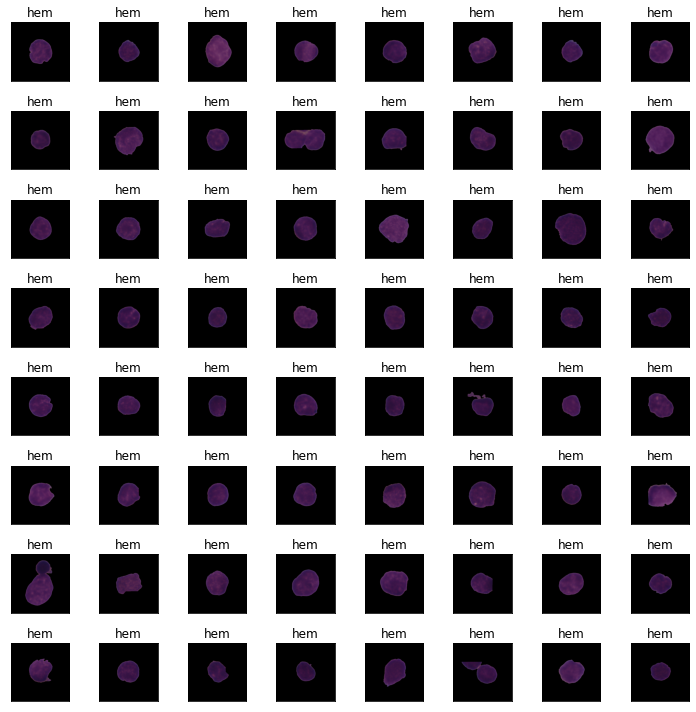

In [13]:
plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(8, 8, figsize= (10, 10), 
                         subplot_kw={"xticks": [], "yticks": []})

for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(train_df['File'][i]))
  ax.set_title(train_df['Label'][i])

plt.tight_layout()
plt.show()

In [14]:
len(train_df)

10661

In [15]:
val_label = pd.read_csv(r'/content/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')
val_label.head(2)

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1


In [16]:
val_df.head(2)

,File,Label
0,/content/C-NMC_Leukemia/validation_data/C-NMC_...,C-NMC_test_prelim_phase_data
1,/content/C-NMC_Leukemia/validation_data/C-NMC_...,C-NMC_test_prelim_phase_data


In [17]:
val_df['Label'] = val_label.labels

In [18]:
for i in range(len(val_df)):
  if val_df.Label[i] == 1:
    val_df.Label[i] = 'all'
  else:
    val_df.Label[i] = 'hem'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [19]:
val_df.head(2)

,File,Label
0,/content/C-NMC_Leukemia/validation_data/C-NMC_...,all
1,/content/C-NMC_Leukemia/validation_data/C-NMC_...,all


In [20]:
batch_size = 32
image_height = 240
image_width = 240

In [21]:
train_set = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_dataframe(dataframe= train_df, 
                                                                                x_col = "File",
                                                                                y_col = "Label",
                                                                                target_size = (450, 450),
                                                                                batch_size= 100,
                                                                                color_mode="rgb",shuffle=True,
                                                                                class_mode='binary')

val_set = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_dataframe(dataframe= val_df, 
                                                                                x_col = "File",
                                                                                y_col = "Label",
                                                                                target_size = (450, 450),
                                                                                batch_size= 100,
                                                                                color_mode="rgb",shuffle=True,
                                                                                class_mode='binary')

Found 10661 validated image filenames belonging to 2 classes.
Found 1867 validated image filenames belonging to 2 classes.


In [22]:
model = tf.keras.Sequential([
                             tf.keras.layers.Rescaling(1./255),
                             tf.keras.layers.Conv2D(32, 3, activation='relu'),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Conv2D(32, 3, activation='relu'),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation= 'relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(36, activation='softmax')

])

model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

history = model.fit(train_set, validation_data= val_set, epochs = 5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


107/107 [==============================] - 2330s 22s/step - loss: 0.5872 - accuracy: 0.7678 - val_loss: 0.7605 - val_accuracy: 0.6111
Epoch 2/5
107/107 [==============================] - 2354s 22s/step - loss: 0.4274 - accuracy: 0.8130 - val_loss: 0.8040 - val_accuracy: 0.5576
Epoch 3/5
107/107 [==============================] - 2358s 22s/step - loss: 0.3742 - accuracy: 0.8402 - val_loss: 1.0041 - val_accuracy: 0.6095
Epoch 4/5
107/107 [==============================] - 2349s 22s/step - loss: 0.3291 - accuracy: 0.8586 - val_loss: 0.9075 - val_accuracy: 0.5833
Epoch 5/5
107/107 [==============================] - 2396s 22s/step - loss: 0.2680 - accuracy: 0.8872 - val_loss: 1.1212 - val_accuracy: 0.6165


In [23]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fb3456a8cd0>>

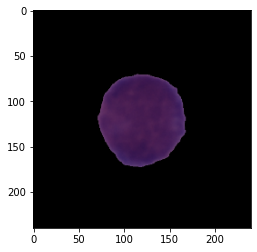

ValueError: ignored

In [25]:
image_file = '/content/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/1257.bmp'

image = tf.keras.preprocessing.image.load_img(image_file, target_size=(image_height, image_width))
plt.imshow(image)
plt.show()
x = tf.keras.preprocessing.image.img_to_array(image)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis= 1)
print("Actual: " + image_file.split("/")[-2])
print("Predicted: " + class_names[np.argmax(pred)])

features = model.predict(x)

In [26]:
model.save('Leukemia Detection Image')

INFO:tensorflow:Assets written to: Leukemia Detection Image/assets


In [27]:
model.save('Leukemia_detection_model.h5')

In [30]:
tf.keras.models.save_model(model, 'Leukemia_detection_model.pb')

INFO:tensorflow:Assets written to: Leukemia_detection_model.pb/assets


In [31]:
# Convert the Model to tflite for ease of deployment on mobile.

converter = tf.lite.TFLiteConverter.from_saved_model('/content/Leukemia_detection_model.pb')
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [32]:
import json

classes = {'0': 'all', '1': 'hem'}
leukemia_class = json.dumps(classes, indent = 4)

print(leukemia_class)

{
    "0": "all",
    "1": "hem"
}
